In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Veri Okuma

In [128]:
dataFrame = pd.read_csv('veriler.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [129]:
dataFrame.describe() ## Verinin istatistikleri

,boy,kilo,yas
count,22.000000,22.000000,22.000000
mean,163.363636,62.136364,28.681818
std,21.077059,22.286651,12.988590
min,125.000000,30.000000,9.000000
25%,156.000000,42.500000,22.250000
50%,165.500000,59.500000,28.500000
75%,179.250000,80.000000,38.000000
max,193.000000,105.000000,55.000000


In [130]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

ulke        0
boy         0
kilo        0
yas         0
cinsiyet    0
dtype: int64

Grafiksel Analiz

<AxesSubplot:xlabel='boy', ylabel='kilo'>

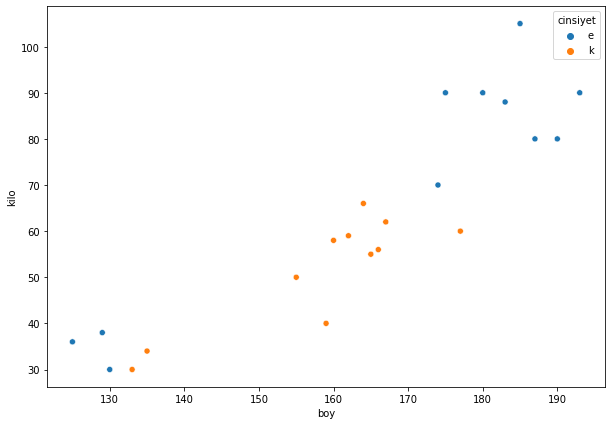

In [131]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='boy',y='kilo',hue = "cinsiyet",data=dataFrame) ## Noktasal grafik

Veri Temizliği

In [132]:
dataFrame = dataFrame.iloc[5:]

<AxesSubplot:xlabel='boy', ylabel='kilo'>

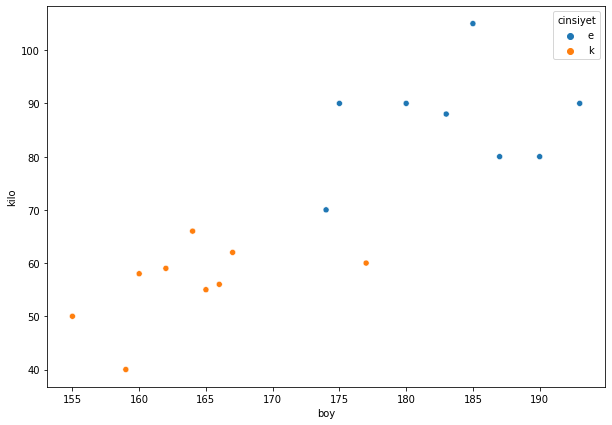

In [133]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='boy',y='kilo',hue = "cinsiyet",data=dataFrame) ## Noktasal grafik

Model Oluşturma

In [114]:
y = dataFrame.iloc[:,4:5] ## cinsiyet ## Bağımlı ## cinsiyet
x = dataFrame.iloc[:,1:4].values ## Bağımsız

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
standardScaler = StandardScaler()
x_train = standardScaler.fit_transform(x_train)
x_test = standardScaler.fit_transform(x_test)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logisticRegression = LogisticRegression(random_state=0)
logisticRegression.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [121]:
guess = logisticRegression.predict(x_test) ## x_teste göre tahmin
guess ## Tahmin verisi

array(['e', 'k', 'k', 'k', 'e', 'e'], dtype=object)

In [122]:
logisticRegression.score(x_test,y_test)

1.0

In [123]:
from sklearn.metrics import confusion_matrix

In [126]:
confusionMatrix = confusion_matrix(y_test,guess)
confusionMatrix

array([[3, 0],
       [0, 3]], dtype=int64)

In [ ]:
## sol üst doğru tahmin sağ üst yanlış tahmin sayısı
## sol alt yanlış tahmin sağ alt doğru tahmin sayısı